# **Project Name**  -  Airbnb Data Exploration: Chicago vs New Orleans



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - Sanjana Kumari

# **Project Summary**

The aim of this project is to perform **Exploratory Data Analysis (EDA)** on the Airbnb dataset for two major cities: **Chicago** and **New Orleans**. The goal is to uncover key trends, patterns, and insights related to **room types**, **pricing strategies**, **guest reviews**, and **property availability**.

Throughout this analysis, we aim to:
- Understand the **distribution of prices** and the factors influencing them.
- Analyze the **room types** and how they vary by city.
- Investigate the relationship between **price** and **other factors** like **number of reviews**, **number of bedrooms**, and **availability**.
- Identify **popular neighbourhoods** and how location impacts **listing prices**.

The insights gained from this analysis will help in shaping **business strategies**, optimizing **pricing models**, and enhancing **guest experiences**. The project ultimately supports the platform's objectives of increasing **market share**, improving **booking rates**, and ensuring **sustained growth** in a highly competitive market.

These findings will be visually represented in a **Tableau dashboard**, which will provide clear and actionable insights to stakeholders for making informed, data-driven decisions.

# **GitHub Link**

https://github.com/Sanjana-97/AirBNB

# **Problem Statement**


The primary objective of this project is to perform Exploratory Data Analysis (EDA) on Airbnb listings from two major U.S. cities—Chicago and New Orleans—using publicly available data from Inside Airbnb. This analysis serves as the foundation for building dashboards in Tableau to visualize key trends and patterns. The goal is to explore various aspects such as listing distribution, property types, room categories, pricing, availability, and host activity in both cities. Through this comparative analysis, we aim to better understand the similarities and differences between the two Airbnb markets.

#### **Define Your Business Objective?**

- To identify the most popular neighbourhoods in terms of listing count and pricing.
- To understand how room types and property types vary between Chicago and New Orleans.
- To analyze pricing patterns across different locations and property types.
- To explore availability and minimum night requirements that affect booking flexibility.
- To evaluate host behavior by examining host listings, reviews, and responsiveness.
- To create a structured dataset that supports effective visualization and storytelling through Tableau dashboards, enabling stakeholders (like hosts, travelers, or business analysts) to make informed decisions.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [13]:
# Import Libraries
import pandas as pd     
import numpy as np       
import matplotlib.pyplot as plt   
import seaborn as sns             
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [14]:
# Load Dataset
df_chicago = pd.read_csv("listings_chic.csv")       # Chicago dataset
df_nola = pd.read_csv("listings_NO.csv")            # New Orleans dataset

# Add city label to each dataset
df_chicago['city'] = 'Chicago'
df_nola['city'] = 'New Orleans'

# Combine both into one DataFrame
df = pd.concat([df_chicago, df_nola], ignore_index=True)

### Dataset First View

In [15]:
# Dataset First Look
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,2384,https://www.airbnb.com/rooms/2384,20250311200238,2025-03-15,city scrape,Hyde Park - Walk to University of Chicago,Solo Hyde Park visitors are invited stay in th...,The apartment is less than one block from beau...,https://a0.muscache.com/pictures/hosting/Hosti...,2613,...,4.95,4.94,R17000015609,f,1,0,1,0,2.02,Chicago
1,7126,https://www.airbnb.com/rooms/7126,20250311200238,2025-03-12,city scrape,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,"Ukrainian Village was just named ""Hottest Neig...",https://a0.muscache.com/pictures/51073/16c81c7...,17928,...,4.90,4.76,R24000114046,f,1,1,0,0,2.98,Chicago
2,10945,https://www.airbnb.com/rooms/10945,20250311200238,2025-03-13,city scrape,The Biddle House (#1),Beautiful first floor apartment in Historic Ol...,NaN,https://a0.muscache.com/pictures/58d1a420-a24b...,33004,...,4.97,4.72,2209984,t,6,6,0,0,0.88,Chicago
3,28749,https://www.airbnb.com/rooms/28749,20250311200238,2025-03-14,city scrape,Quirky Bucktown Loft w/ Parking No Parties,Located on a peaceful treelined street in ener...,Bucktown is a thriving community on the Northw...,https://a0.muscache.com/pictures/95884ff6-a672...,27506,...,4.93,4.72,R24000113825,f,1,1,0,0,1.40,Chicago
4,71930,https://www.airbnb.com/rooms/71930,20250311200238,2025-03-13,city scrape,"Rest, Relax and Explore",A peaceful shared space in Chicago's Ukrainian...,Ukrainian Village / West Town is a beautifully...,https://a0.muscache.com/pictures/e881bea8-a003...,334241,...,4.84,4.84,R23000108832,f,1,0,1,0,0.77,Chicago


### Dataset Rows & Columns count

In [16]:
# Dataset Rows & Columns count
print("Dataset Shape:", df.shape)

Dataset Shape: (16590, 80)


### Dataset Information

In [17]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 80 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16590 non-null  int64  
 1   listing_url                                   16590 non-null  object 
 2   scrape_id                                     16590 non-null  int64  
 3   last_scraped                                  16590 non-null  object 
 4   source                                        16590 non-null  object 
 5   name                                          16590 non-null  object 
 6   description                                   16335 non-null  object 
 7   neighborhood_overview                         9779 non-null   object 
 8   picture_url                                   16590 non-null  object 
 9   host_id                                       16590 non-null 

#### Duplicate Values

In [18]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
# Count of missing values in each column
missing_values = df.isnull().sum()

# Filter columns with at least one missing value
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Display the result
missing_values


neighbourhood_group_cleansed    16590
calendar_updated                16590
neighborhood_overview            6811
neighbourhood                    6810
host_about                       6519
host_location                    4129
license                          3252
review_scores_accuracy           3208
review_scores_checkin            3207
review_scores_value              3207
review_scores_location           3207
first_review                     3206
last_review                      3206
review_scores_rating             3206
reviews_per_month                3206
review_scores_cleanliness        3206
review_scores_communication      3206
price                            2232
estimated_revenue_l365d          2232
beds                             2230
bathrooms                        2181
host_response_rate               2068
host_response_time               2068
host_acceptance_rate             1615
host_neighbourhood                655
host_is_superhost                 432
has_availabi

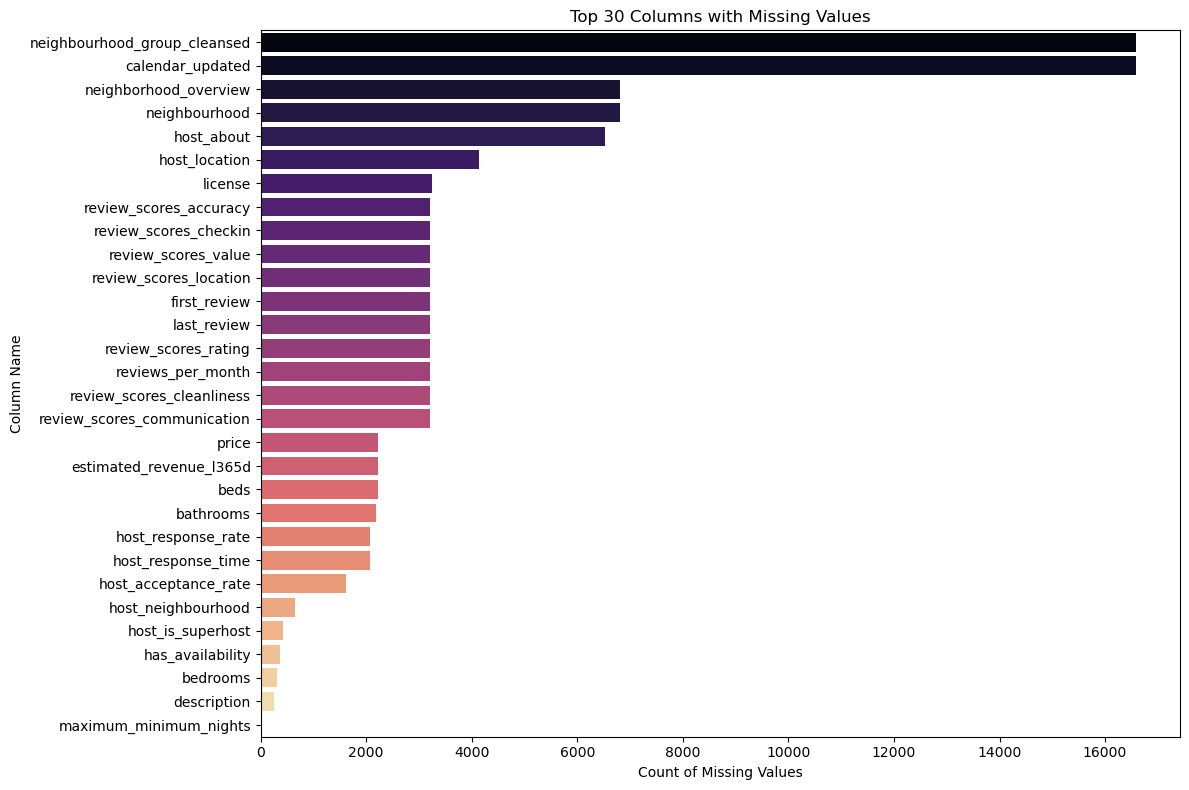

In [20]:
# Visualizing the missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)[:30]

plt.figure(figsize=(12, 8))
sns.barplot(x=missing.values, y=missing.index, palette='magma')
plt.title("Top 30 Columns with Missing Values")
plt.xlabel("Count of Missing Values")
plt.ylabel("Column Name")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

1.	Dataset Size
	-	Total records: 16,590 rows
	-	Total columns: 80
	-	Combined data for two cities: Chicago and New Orleans
2.	Duplicate Values
	-	There are no duplicate rows in the dataset
3.	Missing Values
	-	Some columns have a large number of missing values
	-	neighbourhood_group_cleansed and calendar_updated are completely null
	-	Other columns like review_scores_*, host_about, price, beds, bathrooms, and host_response_* have partial missing data
4.	Data Types
	-	The dataset contains a mix of text, numeric, and date columns
	-	Some numeric columns are stored as strings and need conversion (e.g., price)
5.	City Column Added
	-	A new column city has been added to indicate whether the record belongs to Chicago or New Orleans


## ***2. Understanding Your Variables***

In [21]:
# Dataset Columns
for col in df.columns:
    print(col)

id
listing_url
scrape_id
last_scraped
source
name
description
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms
bathrooms_text
bedrooms
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
availability_eoy
number_of_reviews_ly
estimated_occupancy_l365d
estimat

## 3. ***Data Wrangling***

### Data Wrangling Code

In [22]:
# Write your code to make your dataset analysis ready.
# Select required columns
df = df[[
    'id', 'name', 'host_id', 'host_name',
    'neighbourhood_cleansed', 'latitude', 'longitude',
    'property_type', 'room_type', 'price', 'minimum_nights',
    'number_of_reviews', 'availability_365',
    'review_scores_rating',
    'bathrooms_text', 'bedrooms', 'beds',
    'city'
]]

# Clean the price column
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Drop rows with missing values in key columns
df.dropna(subset=[
    'price', 'room_type', 'neighbourhood_cleansed',
    'latitude', 'longitude', 'property_type'
], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

# Final shape
df.shape

(14358, 18)

In [23]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,review_scores_rating,bedrooms,beds
count,1.435800e+04,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,11696.000000,14351.000000,14337.000000
mean,6.267812e+17,2.314478e+08,36.373604,-88.777192,289.780123,12.260900,61.571807,208.067767,4.778771,2.007944,2.649718
std,5.276640e+17,2.031174e+08,5.950829,1.202097,2379.940350,22.598335,100.332360,123.613660,0.349769,1.430116,2.143057
min,2.384000e+03,2.613000e+03,29.897042,-90.135521,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,4.188287e+07,4.728337e+07,29.960315,-90.071730,107.000000,1.000000,2.000000,90.000000,4.720000,1.000000,1.000000
50%,7.442595e+17,1.572885e+08,41.783340,-87.728764,172.000000,2.000000,21.000000,232.000000,4.870000,2.000000,2.000000
75%,1.123252e+18,4.351051e+08,41.898618,-87.655770,280.000000,30.000000,82.000000,326.000000,4.970000,3.000000,3.000000
max,1.374052e+18,6.824743e+08,42.022200,-87.528420,238121.000000,1125.000000,2241.000000,365.000000,5.000000,29.000000,42.000000


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

id: 14358
name: 13705
host_id: 6313
host_name: 3090
neighbourhood_cleansed: 143
latitude: 11047
longitude: 11104
property_type: 51
room_type: 4
price: 1126
minimum_nights: 53
number_of_reviews: 544
availability_365: 366
review_scores_rating: 137
bathrooms_text: 41
bedrooms: 20
beds: 28
city: 2


### What all manipulations have you done and insights you found?

## Data Cleaning and Manipulations Performed

1. **Merged Two City Datasets**  
   - Combined listings from **Chicago** and **New Orleans**  
   - Added a new column `city` to distinguish the source
     
2. **Checked and Removed Duplicates**  
   - Found **0 duplicate rows**, so no action needed
     
3. **Checked for Missing Values**  
   - Identified columns with a high number of nulls  
   - Notably: `neighbourhood_group_cleansed`, `calendar_updated`, `host_about`, and `review_scores_*`

4. **Dropped Irrelevant or Empty Columns**  
   - Removed columns:
     - `host_neighbourhood`  
     - `neighbourhood`  
     - `neighbourhood_group_cleansed`  
   - These were either inconsistent or entirely null

5. **Selected Required Columns**  
   - Kept **18 columns** relevant to the project and dashboard requirements:
     - `id`, `name`, `host_id`, `host_name`, `neighbourhood_cleansed`, `latitude`, `longitude`, `property_type`, `room_type`, `price`, `minimum_nights`, `number_of_reviews`, `availability_365`, `review_scores_rating`, `bathrooms_text`, `bedrooms`, `beds`, `city`

6. **Cleaned the `price` Column**  
   - Removed currency symbols (`$`, `,`)  
   - Converted to numeric format for analysis

7. **Dropped Rows with Essential Nulls**  
   - Removed rows with missing values in any of the following:
     - `price`, `room_type`, `neighbourhood_cleansed`, `latitude`, `longitude`, `property_type`

8. **Reset Index**  
   - After dropping rows, reset the index to maintain order

---

## Current Dataset Status

- **Rows:** 14,358  
- **Columns:** 18  
- The dataset is clean, concise, and ready for EDA and dashboard creation in Tableau.

---

## Insights

- No specific insights yet — ready to explore:
  - Room types  
  - Price distributions  
  - Neighbourhood-level trends  
  - Host behavior  
  - City-wise comparisons

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Room Type Distribution by City

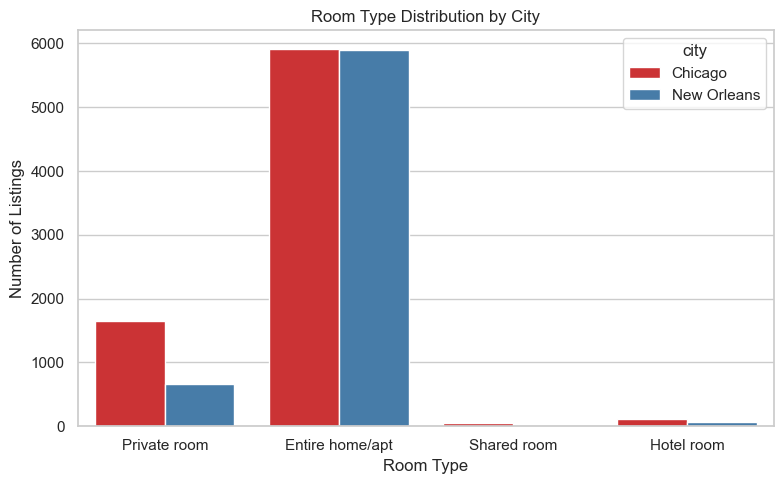

In [25]:
# visualization code
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='room_type', hue='city', palette='Set1')
plt.title('Room Type Distribution by City')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A countplot is ideal for visualizing categorical data like `room_type`, and comparing it across cities helps identify differences in listing preferences.

##### 2. What is/are the insight(s) found from the chart?

- "Entire home/apt" is the most common room type in both Chicago and New Orleans.
- Private rooms are the second most common in both, with a slightly higher share in Chicago.
- Hotel rooms and shared rooms have very low representation in both cities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Helps hosts align with market trends by listing more entire units. Platforms may focus on promoting private rooms in Chicago, where they are more prevalent.  
**Consideration:** Low supply of hotel/shared rooms in both cities may indicate an opportunity to attract more budget-conscious travelers.

####  Price Distribution (Histogram)

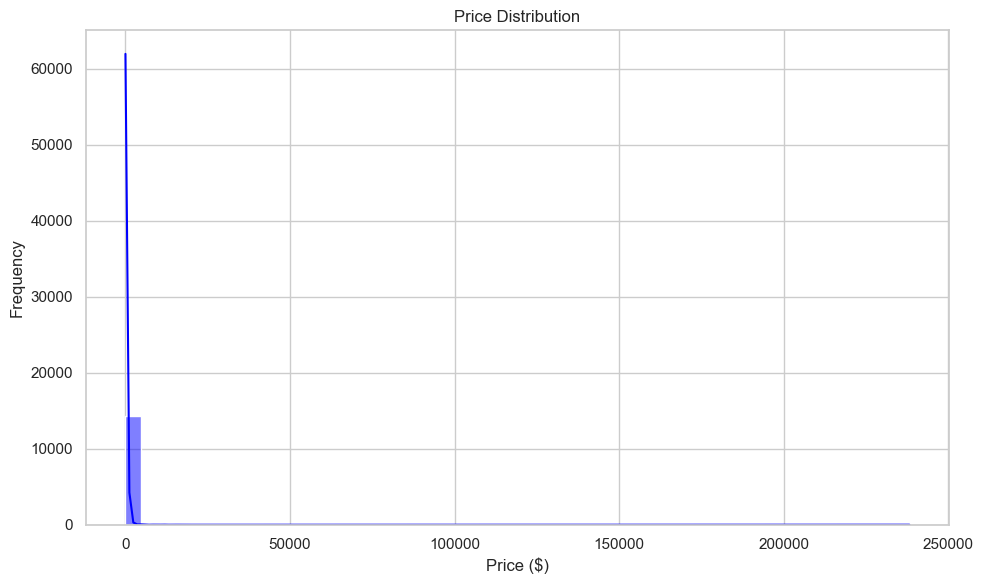

In [26]:
# visualization code
# Plot the price distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title("Price Distribution")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **histogram** with a **Kernel Density Estimate (KDE)** is ideal for visualizing the distribution of continuous variables like **price**. The KDE smooths the distribution and helps identify patterns in the data, such as common price ranges and potential outliers.

##### 2. What is/are the insight(s) found from the chart?

- There is a **large concentration of listings** priced around **50 to 200**.
- A significant number of listings have **prices under 100**, indicating many affordable options.
- A **long tail** on the right side shows that there are a few **high-priced listings** (outliers), suggesting the presence of luxury or premium properties.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**  
- The **high concentration of lower-priced listings** indicates a **larger market** for budget-conscious travelers.
- Platforms could **promote affordable listings** more effectively to attract a wider audience.
  
**Consideration:**  
- **High-priced listings** with fewer occurrences may require **specialized marketing** targeting a more **exclusive audience** or niche travelers.

####  Property Type Distribution

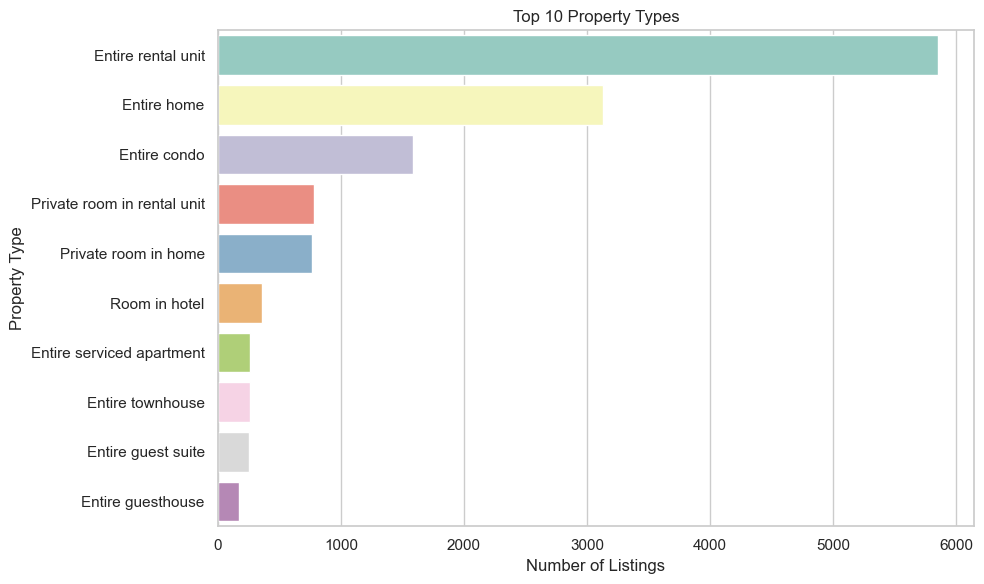

In [27]:
# visualization code
# Get top 10 most common property types
top_props = df['property_type'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_props.values, y=top_props.index, palette='Set3')
plt.title("Top 10 Property Types")
plt.xlabel("Number of Listings")
plt.ylabel("Property Type")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot is ideal for visualizing the frequency of categorical data like `property_type`. Limiting to the top 10 types keeps the chart readable and focuses on the most relevant segments.


##### 2. What is/are the insight(s) found from the chart?

- "Entire rental unit" is the most listed property type, followed by "Entire home" and "Entire condo".
- Private rooms and hotel-type accommodations appear less frequently.
- The majority of listings are entire units, not shared spaces.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Indicates strong demand for fully private accommodations. Hosts can prioritize listing entire units.  
**Consideration:** Lower representation of shared options and hotel rooms might be a gap in serving budget or short-stay travelers.

#### Top 10 Neighbourhoods by Number of Listings


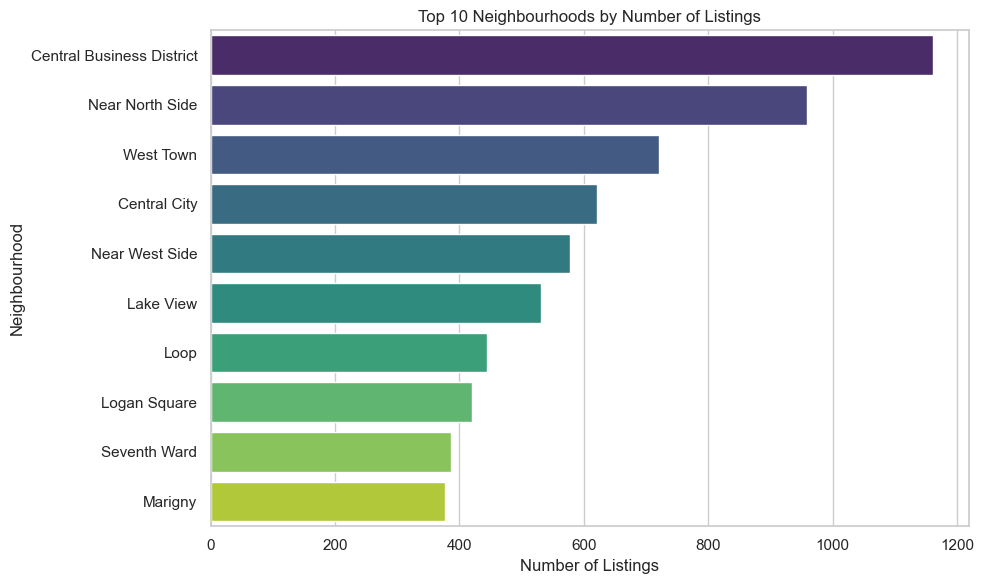

In [28]:
# visualization code
# Get top 10 neighbourhoods with the highest number of listings
top_neighbourhoods = df['neighbourhood_cleansed'].value_counts().nlargest(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index, palette='viridis')
plt.title("Top 10 Neighbourhoods by Number of Listings")
plt.xlabel("Number of Listings")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for showing the frequency of listings by neighbourhood, making it easy to compare which areas have the most active Airbnb hosts.

##### 2. What is/are the insight(s) found from the chart?

- **Central Business District** (New Orleans) has the highest number of listings, followed by **Near North Side** and **West Town** (both in Chicago).
- This indicates that the Airbnb market is highly concentrated in a few key neighbourhoods in each city.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** High listing density shows strong host engagement in these areas—ideal for targeted marketing, promotions, and service improvements.  
**Consideration:** Other neighbourhoods may have lower visibility; promoting listings in those areas could help balance market reach and avoid oversaturation in high-density zones.

#### Average Price by Room Type

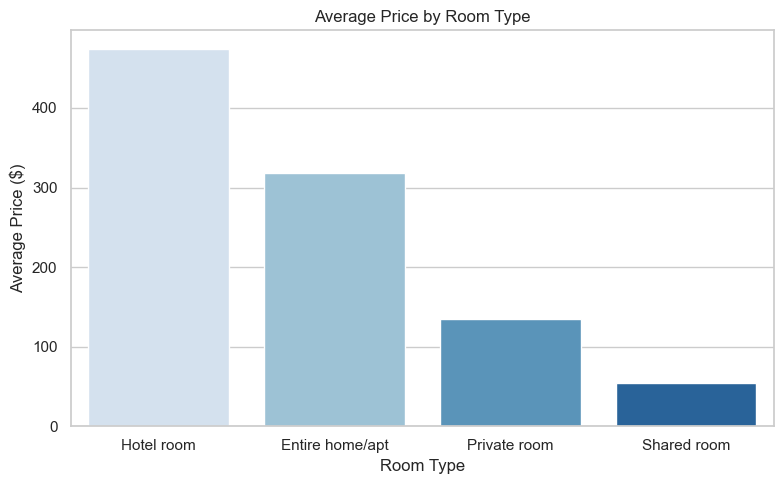

In [29]:
# visualization code
# Calculate the average price by room type
avg_price_by_room = df.groupby('room_type')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_room.index, y=avg_price_by_room.values, palette='Blues')
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is ideal for comparing the average prices across different room types. It provides a clear visual of how pricing varies depending on the type of listing.

##### 2. What is/are the insight(s) found from the chart?

- **Hotel rooms** have the highest average price at 473.86.
  
- **Entire home/apt** comes next at 318.50.
  
- **Private rooms** and **shared rooms** have significantly lower prices, with private rooms averaging 134.83 and shared rooms at 54.13.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** 
- **Hotel rooms** and **entire homes** appear to be high-value offerings, suggesting a profitable market segment. 
- Hosts may focus on pricing strategies for entire homes and private rooms.
  
**Consideration:**  
- **Shared rooms** and **private rooms** are more affordable, offering budget-friendly options. Hosts can target budget travelers by offering more shared room listings at lower prices.

#### Top 10 Neighbourhoods by Average Price

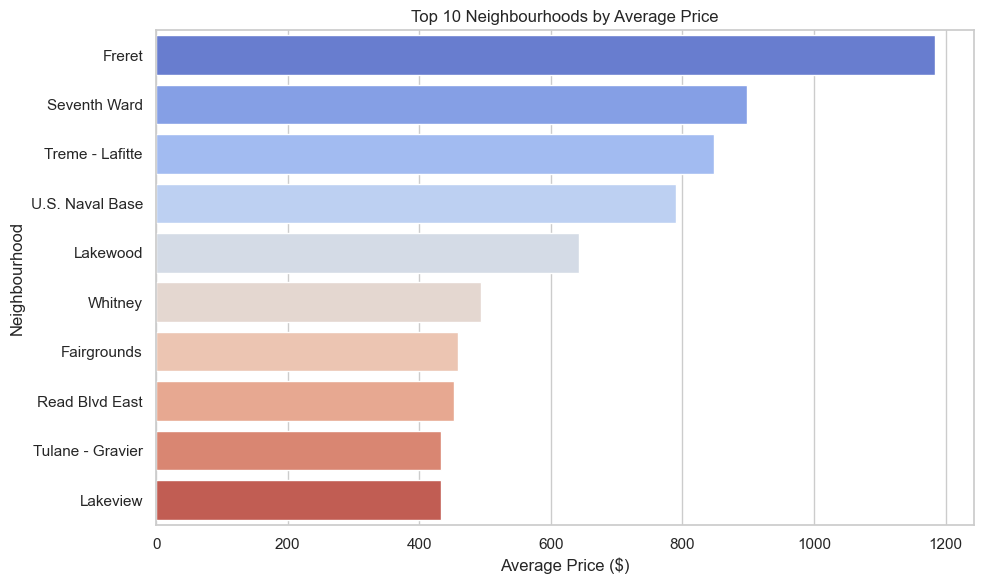

In [30]:
# visualization code
# Calculate average price by neighbourhood
avg_price_by_neighbourhood = df.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

# Plot the top 10 neighbourhoods by average price
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_neighbourhood.values, y=avg_price_by_neighbourhood.index, palette='coolwarm')
plt.title("Top 10 Neighbourhoods by Average Price")
plt.xlabel("Average Price ($)")
plt.ylabel("Neighbourhood")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is effective for showing which neighbourhoods have the highest average prices. This helps identify areas with premium listings and understand price trends across locations.


##### 2. What is/are the insight(s) found from the chart?

- **Freret** neighbourhood has the highest average price at 1184.10.
- **Seventh Ward** and **Treme - Lafitte** follow with average prices around 900–850.
- Other neighbourhoods like **Lakewood**, **Whitney**, and **Fairgrounds** have more affordable average prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** 
- Targeted marketing can promote **premium neighbourhoods** like Freret for high-value bookings.
- Hosts in **higher-priced neighbourhoods** could optimize pricing strategies.

**Consideration:**  
- Lower-priced areas could be marketed to attract more budget-conscious travelers and increase occupancy.

#### Availability Distribution

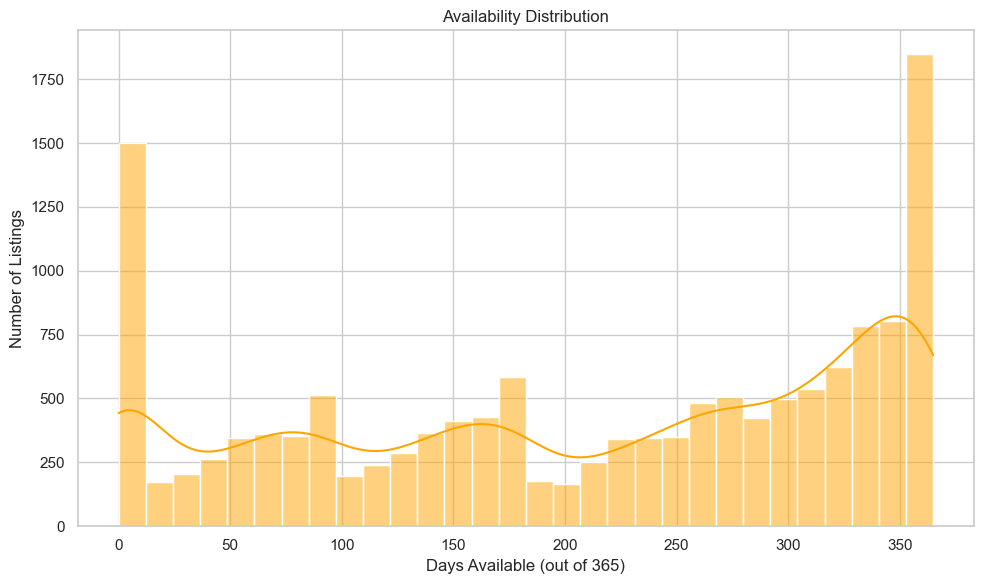

In [31]:
# Chart - 6 visualization code
# Plot the distribution of availability_365
plt.figure(figsize=(10, 6))
sns.histplot(df['availability_365'], bins=30, kde=True, color='orange')
plt.title("Availability Distribution")
plt.xlabel("Days Available (out of 365)")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with a Kernel Density Estimate (KDE) is ideal for visualizing the distribution of continuous data, like the number of days a listing is available throughout the year. The KDE helps us understand the overall trend and smooth out the distribution.


##### 2. What is/are the insight(s) found from the chart?

- **Higher-priced listings** do not always have **more reviews**. In fact, there are **expensive listings** with **few reviews** and **cheaper listings** with **many reviews**.
- The chart shows a **wide spread** of reviews across various price points, meaning price is not a strong indicator of the number of reviews.
- Some **low-priced listings** are heavily reviewed, which shows that **price** doesn’t always affect how many people review the property.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**  
- **Higher-priced listings** can expect **more reviews** over time, but **price alone** does not guarantee more engagement.  
- Hosts of **low-priced listings** could capitalize on their **budget-friendly pricing** by ensuring they attract more guests and reviews.

**Consideration:**  
- Listings with **high prices but few reviews** may need to improve visibility and guest engagement to justify the price and attract more reviews.

#### Price vs. Number of Reviews

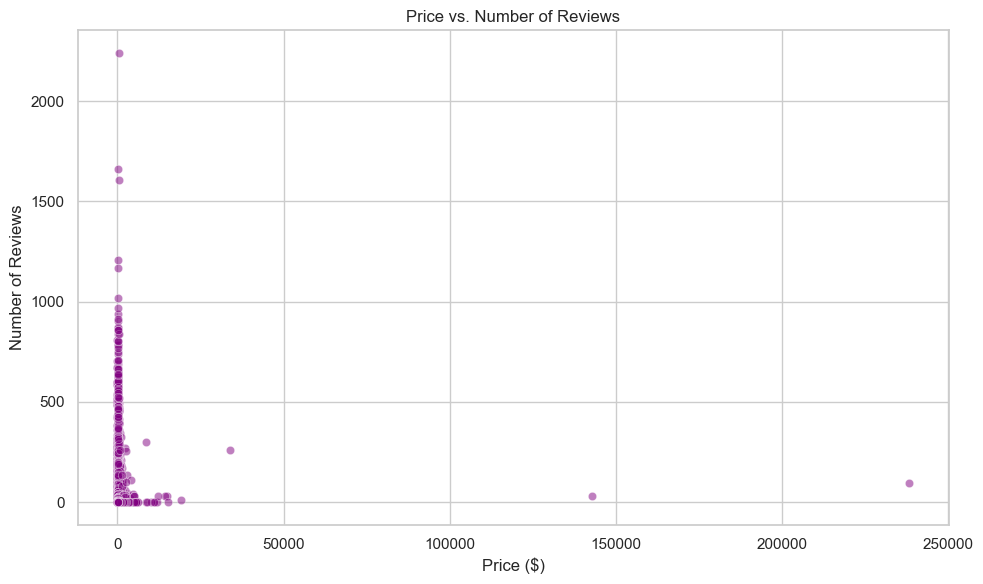

In [32]:
# Chart - 7 visualization code
# Plot the scatter plot for price vs number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='number_of_reviews', data=df, color='purple', alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Price ($)")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing the relationship between two numerical variables, in this case, `price` and `number_of_reviews`. It allows us to see if there is any visible correlation between these two factors.


##### 2. What is/are the insight(s) found from the chart?

- **Price and reviews** do not have a clear correlation. Some **high-priced listings** have fewer reviews, while some **low-priced listings** have many reviews.
- **Cheap listings** tend to have a **higher number of reviews**, potentially indicating that lower-cost options are more likely to be booked or have more frequent stays.
- The **scatter is spread** across all price ranges, suggesting that both expensive and inexpensive listings get varying levels of attention and reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**  
- **Cheap listings** could be a great opportunity for hosts to attract more bookings and reviews, offering better value for customers.
  
**Consideration:**  
- Hosts with **expensive listings** but few reviews might need to focus on improving the visibility of their properties, offering special promotions or increasing guest engagement to receive more reviews.

#### Correlation Heatmap

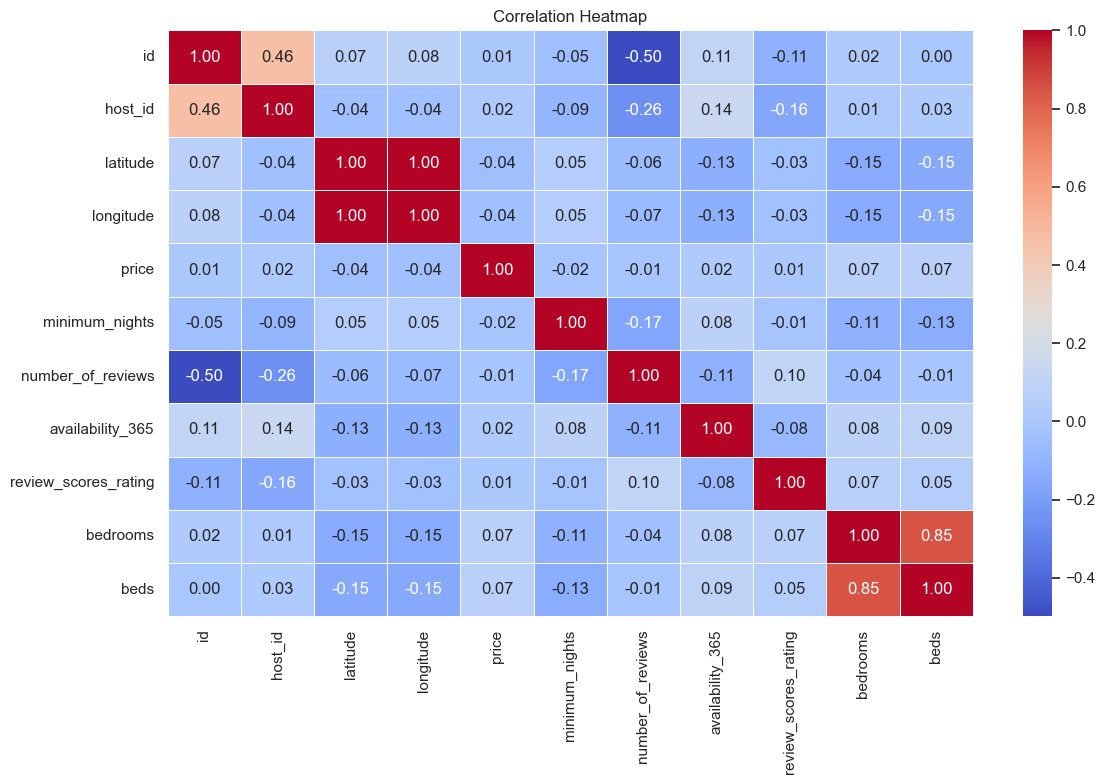

In [33]:
# Chart - 8 visualization code
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation between numerical features
correlation_matrix = numeric_df.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A **correlation heatmap** is a great tool for quickly identifying relationships between numerical variables. It highlights how variables such as **price**, **availability**, and **reviews** interact with each other. This helps understand key dependencies and can guide further analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

- **Price** has a **very weak correlation** with **availability** (0.02) and **number of reviews** (-0.007), meaning **price is not strongly related** to how many days a property is available or how many reviews it gets.
- **Review scores** have **low correlation** with **price** (0.0087), **availability** (-0.0816), and **number of reviews** (0.1003), suggesting **review scores** are largely **independent** of other factors.
- **Number of reviews** has a **weak negative correlation** with **availability** (-0.1083), which indicates that more reviews don't strongly correlate with the property being available longer, although this is a weak relationship.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**  
- The low correlation between **price** and **reviews** suggests that pricing strategies should focus more on property value, guest experience, and marketing, rather than relying solely on reviews or availability.
  
**Consideration:**  
- **Review scores** have low correlation with other factors, indicating that improving reviews may require better guest experiences or proactive engagement rather than adjusting price or availability.
  

#### Price vs. Bedrooms/Beds


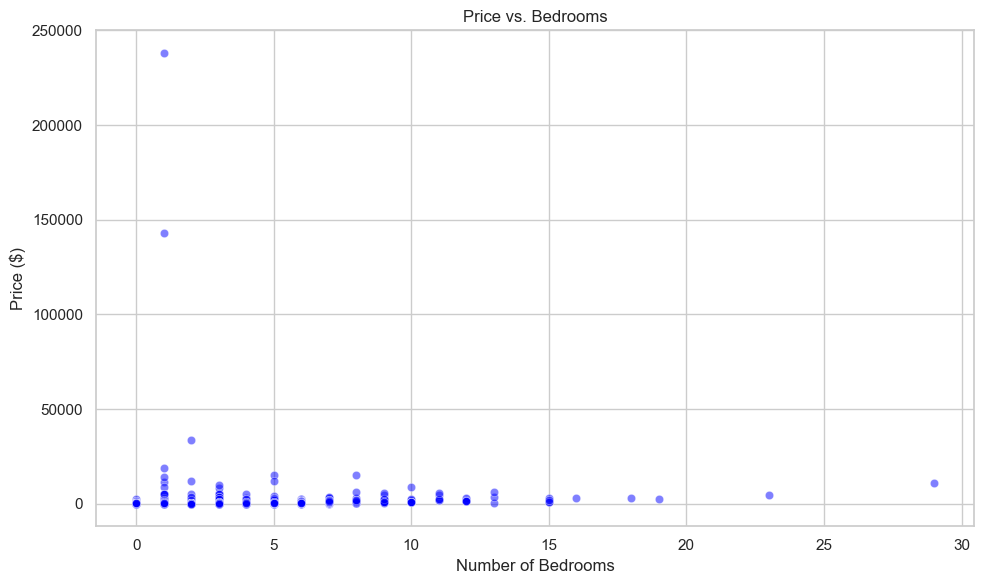

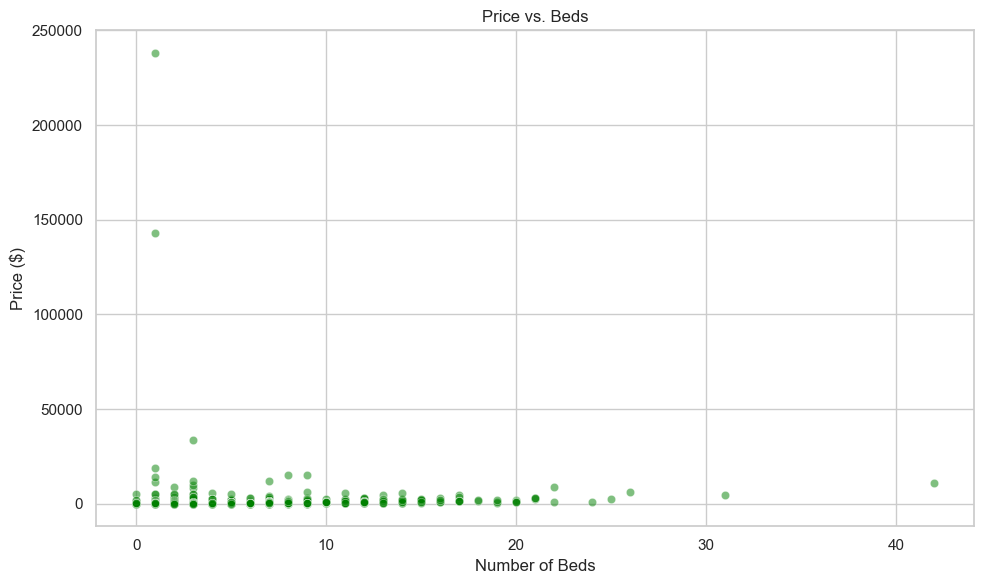

In [34]:
# visualization code
# Plot the scatter plot for price vs number of bedrooms
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bedrooms', y='price', data=df, color='blue', alpha=0.5)
plt.title("Price vs. Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

# Plot the scatter plot for price vs number of beds
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beds', y='price', data=df, color='green', alpha=0.5)
plt.title("Price vs. Beds")
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

We used scatter plots to explore the relationship between **price** and two different numerical variables: **number of bedrooms** and **number of beds**. These variables are likely to be related to the price of the listing.


##### 2. What is/are the insight(s) found from the chart?

- **Price vs. Bedrooms**: The **correlation is very weak**, showing that the number of bedrooms has **little impact** on price.
- **Price vs. Beds**: Similarly, the **correlation is very weak**, suggesting that the number of beds also has **minimal influence** on price.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**  
- Pricing decisions should not rely solely on the number of rooms or beds. It’s important to factor in **location**, **property type**, and **additional features** when determining the price.

**Consideration:**  
- Hosts should enhance their listings with **unique features**, **amenities**, and **location advantages** rather than just focusing on room or bed count to justify higher prices.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

### Suggestions for Achieving Business Objectives

#### 1. **Focus on Dynamic Pricing & Guest Segmentation**

- **Targeting Budget Travelers:**
  - **Promote affordable listings** in high-demand areas where budget-friendly options are abundant. Focus on room types that are more affordable to attract a larger number of budget-conscious guests.
  - Focus on listings with **low minimum nights** to attract short-term travelers looking for flexible stays.

- **Catering to Luxury Travelers:**
  - **Highlight premium listings** in exclusive neighborhoods or those with higher ratings, positioning them as high-end options. Emphasize high-quality guest experiences for those willing to pay more.
  - Create targeted promotions for **high-priced listings** that cater to luxury travelers or those seeking long stays in niche areas.

#### 2. **Optimize Listings Based on Location & Market Demand**

- **Target Neighbourhoods with High Demand**:
  - Focus marketing efforts on the most sought-after areas, using location as a leverage point for pricing, while creating exclusive offers for areas with premium properties.
  
- **Location-Price Balance**:
  - Market premium destinations based on their high value in specific areas. This ensures guests are willing to pay a premium price for locations with desirable features or attractions.

#### 3. **Enhance Customer Experience to Drive Reviews & Increase Bookings**

- **Price and Reviews Insight**:
  - Properties with more reviews tend to have higher visibility and more bookings. The platform can incentivize hosts to focus on customer experience to increase reviews while ensuring competitive pricing to attract more guests.
  
- **Improving Guest Engagement**:
  - Encourage better reviews through tailored promotions for properties that are underperforming in reviews despite higher prices. This can include offering special deals or focusing on customer service excellence.

#### 4. **Maximize Property Availability for Consistent Bookings**

- **Availability Optimization**:
  - Listings available year-round tend to secure more bookings. Encourage hosts to maintain consistent availability to maximize bookings.
  
- **Seasonal Optimization**:
  - For properties with limited availability, target seasonal travelers or use limited availability listings to increase exposure during peak times like holidays, events, or special occasions.

# **Conclusion**

### Conclusion for the Project

The **Exploratory Data Analysis (EDA)** provided critical insights into the factors that influence Airbnb pricing and booking patterns across **Chicago** and **New Orleans**. Through a series of visualizations and statistical analysis, we have identified key trends and relationships within the data, particularly in terms of **price distribution**, **room types**, **neighbourhood popularity**, and **availability**.

The following conclusions can be drawn from the analysis:

- **Pricing strategies** should be tailored to **target different customer segments**, including **budget-conscious travelers** and **luxury travelers**. By focusing on **affordable listings** in high-demand areas and **premium offerings** in exclusive neighbourhoods, the platform can better serve diverse customer needs.
  
- **Location-based insights** are crucial for optimizing marketing efforts. **Top neighbourhoods** with **high listings** and **higher average prices** should be prioritized for targeted promotions, while **neighbourhoods with lower prices** can be marketed to attract more budget-friendly guests.
  
- **Guest experience** plays a significant role in **increasing reviews**, which directly impacts visibility and future bookings. The analysis of **review scores** and **price** reveals that properties with more reviews tend to be more popular and are able to justify higher prices. Thus, improving **guest engagement** is essential for fostering better reviews and increasing overall revenue.
  
- **Availability optimization** is key for consistent bookings. Listings with **higher availability** throughout the year are more likely to generate consistent revenue. Hosts should be encouraged to keep their properties available for longer periods to capture both **seasonal** and **year-round travelers**.

By implementing these strategies, the platform can better align with its business objectives, driving higher **guest satisfaction**, **increased bookings**, and **sustained growth** in a competitive market.

This project’s findings will directly inform the development of a **Tableau dashboard** to visualize these insights, allowing the client to make data-driven decisions and fine-tune their approach for future success.

# ***Thankyou !!!***

In [36]:
# Save the cleaned dataframe to a CSV file
df.to_csv('cleaned_airbnb_data.csv', index=False)